# EDA of Telco Customer Churn dataset

In [54]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#read the dataset
tc = pd.read_csv('Telco-Customer-Churn.csv',index_col=0)

In [56]:
#reading first five rows of the dataset
tc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
#finding the data types of the columns
tc.get_dtype_counts()

float64     1
int64       2
object     17
dtype: int64

In [58]:
#3 numerical features and 17 categorical features
tc.TotalCharges.dtype

dtype('O')

In [59]:
#Converting TotalCharges to float
tc['TotalCharges'] = pd.to_numeric(tc['TotalCharges'],errors='coerce')

In [60]:
tc.get_dtype_counts()

float64     2
int64       2
object     16
dtype: int64

In [61]:
#find if missing values are present
tc.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [62]:
#11 missing values, dataset is not clean
#Remove the row of data with the missing values
tc.dropna(axis = 0, inplace=True)


In [63]:
#get the dimensions of the dataframe
tc.shape

(7032, 20)

In [64]:
#get concise summary of dataset
tc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Basic Information acquired about the dataset:

1. The data initially had 11 missing values int the TotalCharges column which were removed, now the dimension of the data set      is 7032 x 20.
2. There are 4 columns having numerical data.
3. Other columns possess categorical data.

# Analysing Numerical Features

#### 1. Plotting density functions

##### Density distribution graph for Tenure of the customers: 

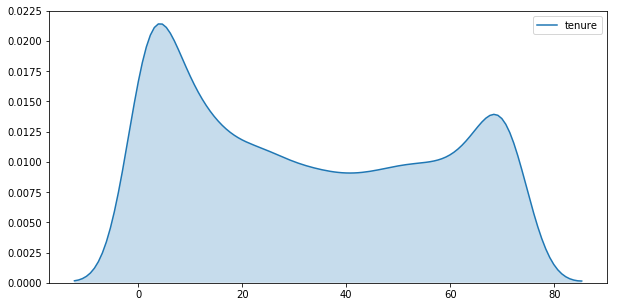

In [67]:
#plt.rcParams['figure.figsize'] = [10,5]
sns.kdeplot(data = tc['tenure'],shade=True)

From the graph, we see that there are more people having shorter tenures, with the plot peaking at roughly around 10 months.

##### Density distribution graph for Monthly Charges of the customers: 

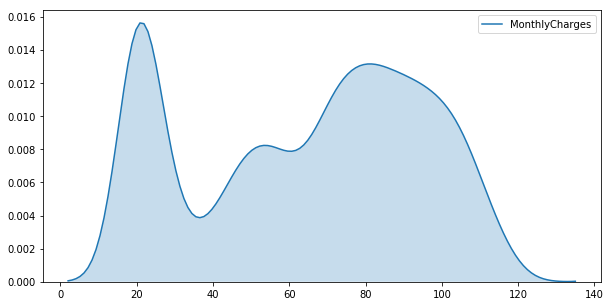

In [19]:
sns.kdeplot(data=tc['MonthlyCharges'],shade=True)

The distribution peaks at around 20 and majority of the portion is from 60 to 100.

##### Density distribution graph for Total Charges of the customers: 

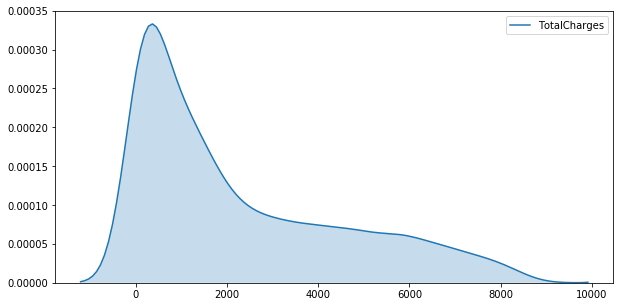

In [68]:
sns.kdeplot(data=tc['TotalCharges'],shade=True)

The distribution peaks around 500 and then descends steadily.

#### 2. Plotting graphs and finding their realtionship with Churn

i) For tenure:

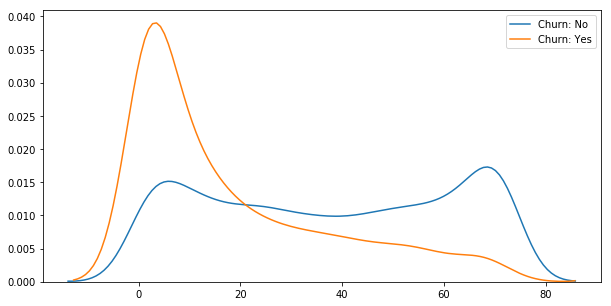

In [21]:
sns.kdeplot(tc[tc['Churn'] == 'No']['tenure'].dropna(), label= 'Churn: No')
sns.kdeplot(tc[tc['Churn'] == 'Yes']['tenure'].dropna(), label= 'Churn: Yes')

We observe that people having lesser tenures are more likely to churn than the ones with shorter tenures. Also, customers with 
longer tenure(>60), are more likely not to churn.

ii) For Monthly Charges:

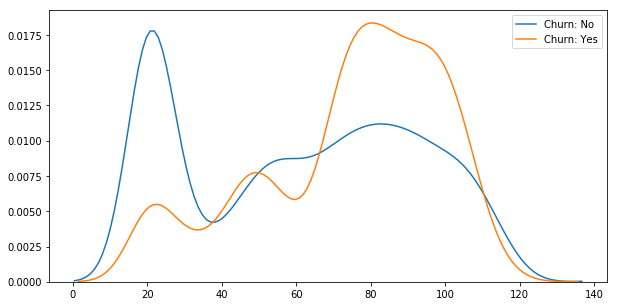

In [22]:
sns.kdeplot(tc[tc['Churn'] == 'No']['MonthlyCharges'].dropna(), label= 'Churn: No')
sns.kdeplot(tc[tc['Churn'] == 'Yes']['MonthlyCharges'].dropna(), label= 'Churn: Yes')

Customers with Monthly Charges between 65 and 110 units churn more.

iii) For Total Charges:

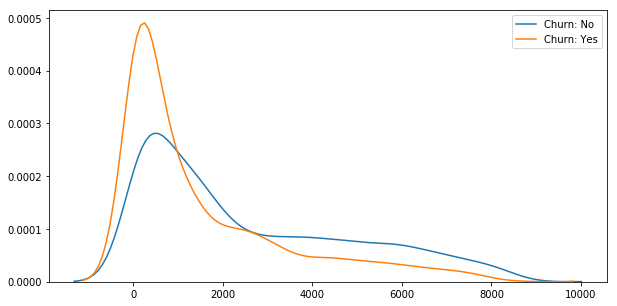

In [23]:
sns.kdeplot(tc[tc['Churn'] == 'No']['TotalCharges'].dropna(), label= 'Churn: No')
sns.kdeplot(tc[tc['Churn'] == 'Yes']['TotalCharges'].dropna(), label= 'Churn: Yes')

People with fairly lesser Total Charges churn much more.

#### 3. Finding the distribution of Senior Citizens using Countplot

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

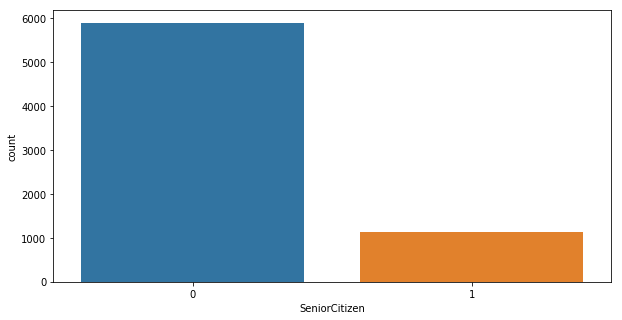

In [75]:
sns.countplot(x = 'SeniorCitizen',data=tc)
tc['SeniorCitizen'].value_counts()

16.24% of the customers are Senior Citizens

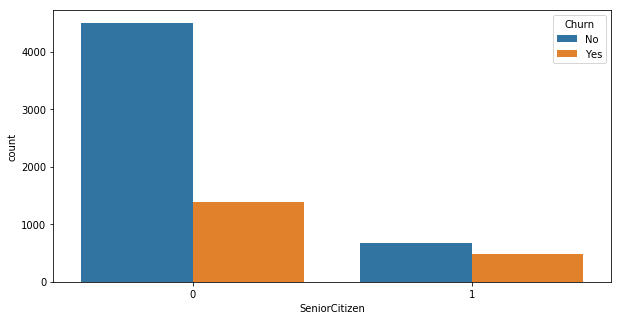

In [78]:
sns.countplot(x = 'SeniorCitizen',data=tc,hue='Churn')

Seeing from the plot, senior citizens are more likely to churn than non-seniors

#### 4. Finding relationship between different parameters

i) Total Charges vs tenure

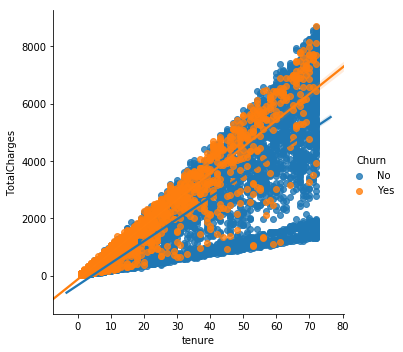

In [83]:
plt.rcParams['figure.figsize'] = [30,20]
sns.lmplot(x='tenure',y='TotalCharges',data=tc,hue='Churn')

- There are more customers having less Total Charges and less tenure
- People with more Total Charges and more Tenure churn less as density of orange points is less in the upper region of the plot
- Both the regression lines have positive slopes indicating that Total Charges and tenure have a positive correlation.

ii) Monthly Charges vs Churn using swarmplot

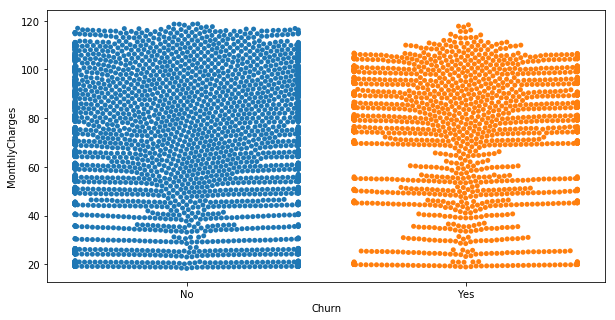

In [79]:
sns.swarmplot(x=tc['Churn'],y=tc['MonthlyCharges'])

People who churn have most of their Monthly Charges from 60 to 110 units.(as we have seen before from the distribution plot)

######  Replacing Churn values to 0 and 1 so as to compare it with numerical data

In [28]:
#replacing values of Churn attributes
pd.set_option('mode.chained_assignment', None)
num_data = tc.copy(deep=True)
num_data.Churn[num_data.Churn == 'Yes'] = 1
num_data.Churn[num_data.Churn == 'No'] = 0
num_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [29]:
#Converting the data type to int
num_data['Churn'] = num_data['Churn'].astype(int)

In [30]:
num_data = num_data.select_dtypes(exclude=[object])
num_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
customerID,,,,,
7590-VHVEG,0,1,29.85,29.85,0
5575-GNVDE,0,34,56.95,1889.50,0
3668-QPYBK,0,2,53.85,108.15,1
7795-CFOCW,0,45,42.30,1840.75,0
9237-HQITU,0,2,70.70,151.65,1


Finding the correlation between different parameters:

In [31]:
pearson_mat = num_data.corr()
pearson_mat

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000


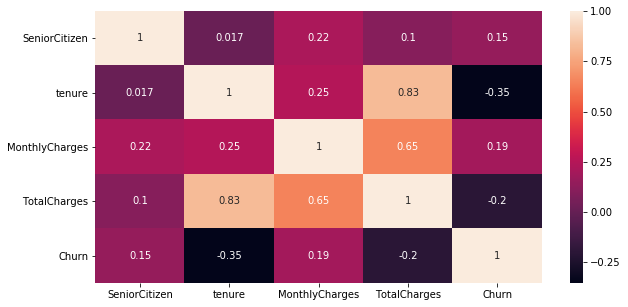

In [69]:
sns.heatmap(num_data.corr(),annot=True)

Observations:


1. Darker the shades get in the heatmap, more is the correlation between the two paramters.
2. Total Charges and tenure have the highest correlation factor(0.83)
3. Total Charges and tenure have a negative correalation with Churn, implying that as their value increases, churn decrease and vice-versa, although correlation factors is not much.
4. Similar argument can be made for Monthly Charges which has a positive correlation with Churn.

######  Pairwise plots

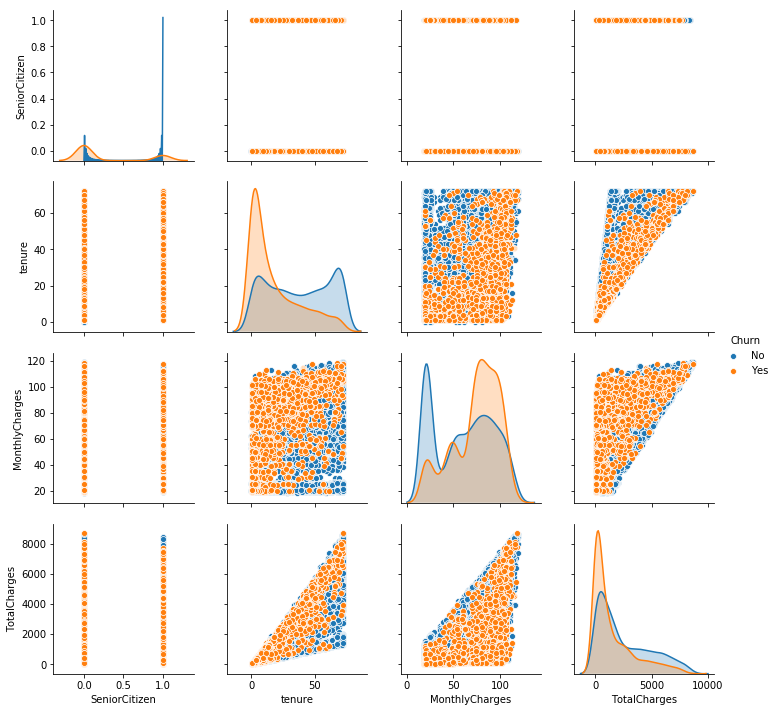

In [33]:
sns.pairplot(data=tc,hue='Churn')

#### Important conclusions drawn from analysis of numerical data:

1. People having shorter tenures are more likely to churn.
2. People having less Total Charges churn more.
3. There's a string correlation between Tenure and total Charges.
4. Although there are less number of Senior Citizens, the percentage of them churning is more than non-seniors.

# Analysing Categorical Features

#### Gender

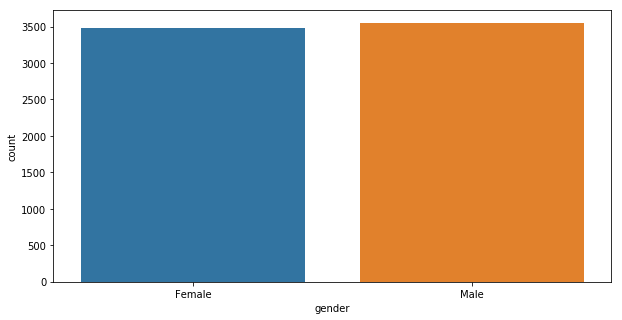

In [85]:
plt.rcParams['figure.figsize'] = [10,5]
sns.countplot(x = 'gender',data=tc)

Roughly the same percentage of male and female customers.

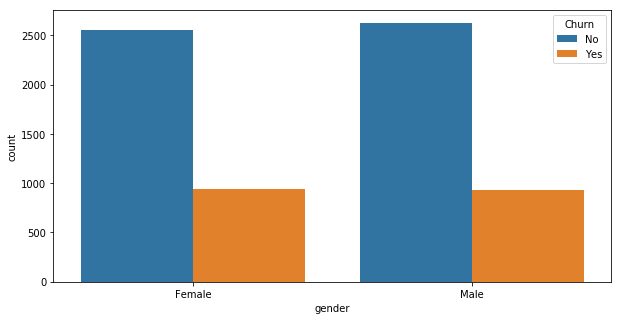

In [35]:
sns.countplot(x = 'gender',data=tc,hue='Churn')

Also, the percenatge of male customers who churn is also very close to that of females.

#### Partners

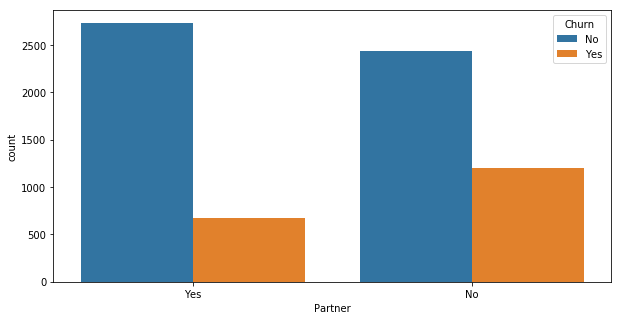

In [36]:
sns.countplot(x = 'Partner',data=tc,hue='Churn')

More customers are there who have partners, but they tend to churn less than those who do not have partners.

#### Dependents

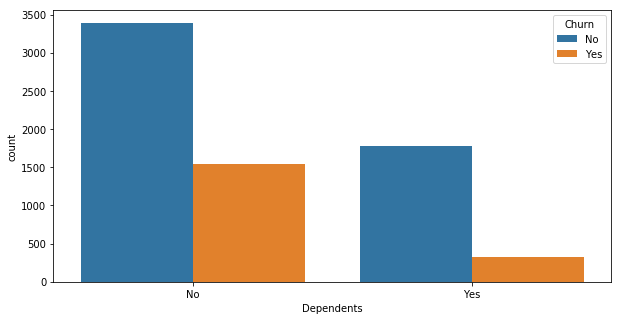

In [37]:
sns.countplot(x = 'Dependents',data=tc,hue='Churn')

There are almost the double the amount of non-dependent customers and also their churn amount is more.

#### Phone Service

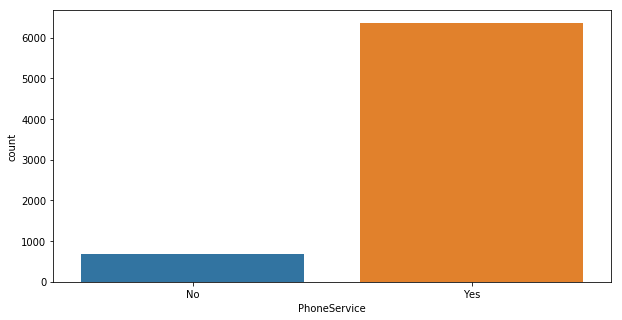

In [38]:
sns.countplot(x = 'PhoneService',data=tc)

Almost 90% people have Phone Services.

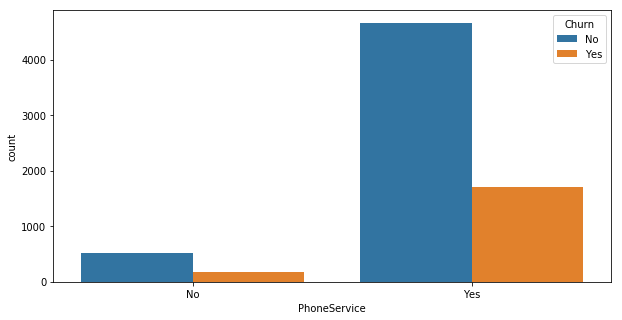

In [39]:
sns.countplot(x = 'PhoneService',data=tc,hue='Churn')

People having Phone service also churn more.

#### Multiple Lines

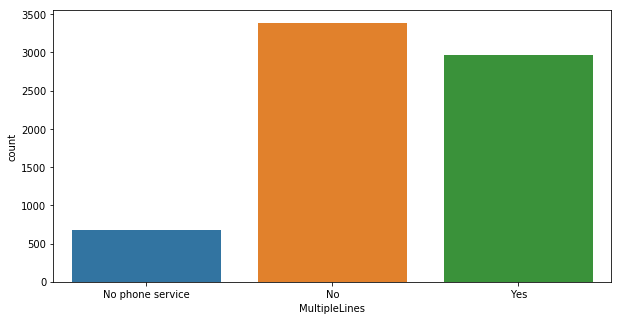

In [97]:
sns.countplot(x = 'MultipleLines',data=tc)

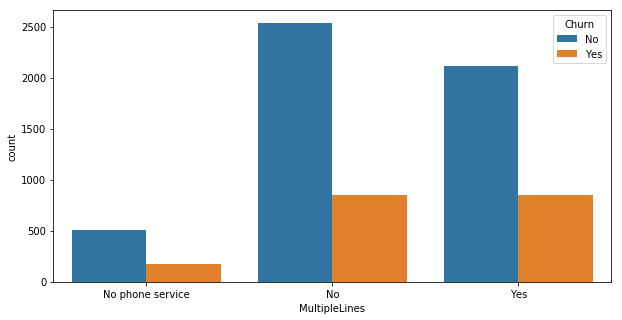

In [98]:
sns.countplot(x = 'MultipleLines',data=tc,hue='Churn')

Around 43% people have Multiple lines but the chuurn rate of customers with or without multiple lines is more or less the same.

#### Internet Service

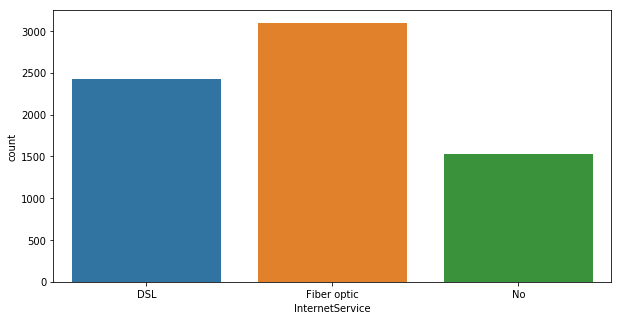

In [40]:
sns.countplot(x = 'InternetService',data=tc)

Around 21% of customers do not have Internet connection. Those who have, Fibre optics proves to be the more popular one.

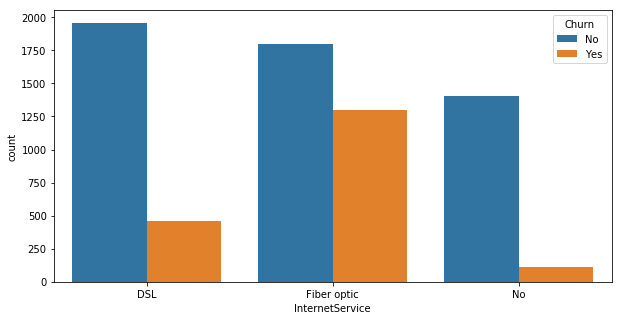

In [86]:
#plt.rcParams['figure.figsize'] = [10,5]
sns.countplot(x = 'InternetService',data=tc,hue='Churn')

Inspite of more customers preferring Fibre Optics connection, their churn rate is also more. People having DSL do not move to other companies as much.

#### Contract

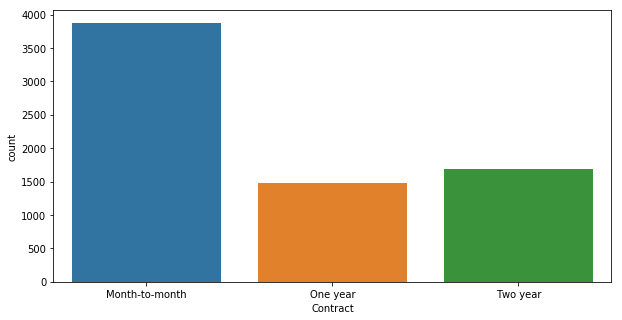

In [91]:
sns.countplot(x = 'Contract',data=tc)

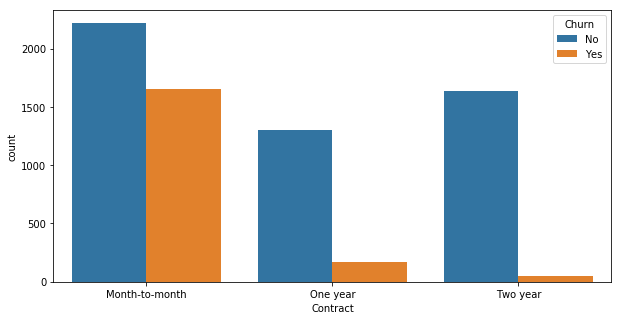

In [92]:
sns.countplot(x = 'Contract',data=tc,hue='Churn')

Majority of the customers have month-to-month contracts, but their churn rate is also very high. People who have long contracts have more tendency to stick with the company.

#### Paperless Billing

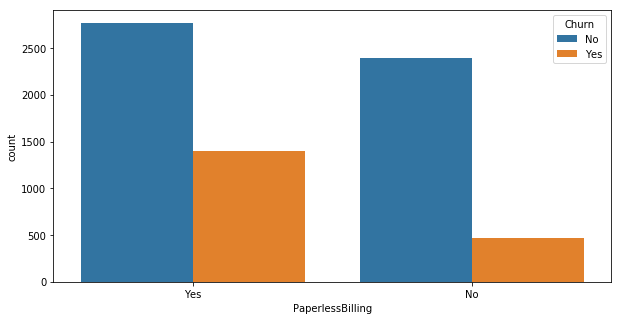

In [94]:
sns.countplot(x = 'PaperlessBilling',data=tc,hue='Churn')

People prefer to pay their bills without involving paper

#### Payment Method

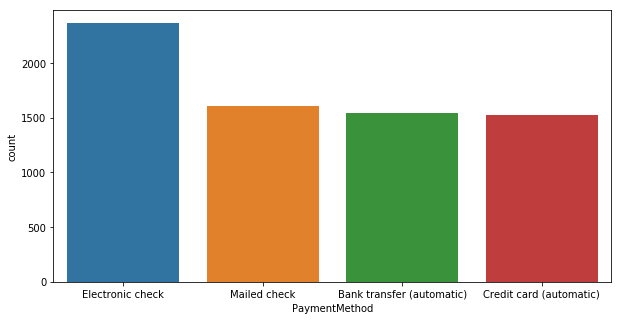

In [95]:
sns.countplot(x = 'PaymentMethod',data=tc)

Most customers pay electronicaly, while the amount of customers paying through mailed check, bank transfer or credit cards is roughly the same. 

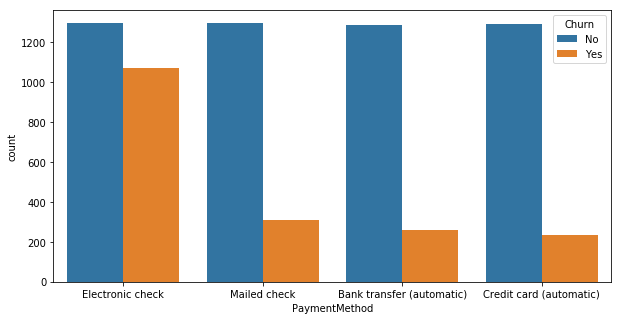

In [96]:
sns.countplot(x = 'PaymentMethod',data=tc,hue='Churn')

Also, people paying via electronic checks also churn much more when compared to the other three types.

#### Important Conclusions drawn from Categorical data

1. Non-dependents churn more.
2. People having fibre-optic connections have exceptinally high rate of churn rate.
3. Same can be said for people having month-to-month contracts. People with longer contracts seem to be more committed to using the services of the company.
4. Also, more people pay electronically but they are also the ones who usually churn the most.